In [2]:
# Algorithm to find out whether a function is balanced or constant. Balanced function gives 0 as an output, for exactly one half of the inputs, and 1 for the other half.
# Constant function gives the same output for any input.
# I will use 3 qubit functions.

import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

In [3]:
provider = IBMQ.providers()[0]

In [4]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') fr

In [5]:
backend = provider.get_backend('ibmq_qasm_simulator')

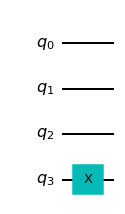

In [11]:
# first define a function taking 4 inputs (although it will only operate on 3 inputs) the result is
# then written on the 4th bit.

# The constant function giving 1 as the output for all of the inputs apply the NOT gate on 4th qubit
n = 4
constantFunction = QuantumCircuit(n)
constantFunction.x(n - 1)
constantFunction.draw()

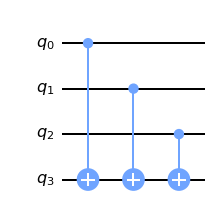

In [31]:
# The balanced function gives 0 for half of the input and 1 for the other half
balancedFunction = QuantumCircuit(n)
# Applying cnot with all the qubits as control bits one by one will give a balanced function.
# Although just applying on one of the qubits  will also give a balanced function, but that method
# above will ensure a mix of results
for i in range(n - 1):
    balancedFunction.cnot(i, n - 1)
balancedFunction.draw()

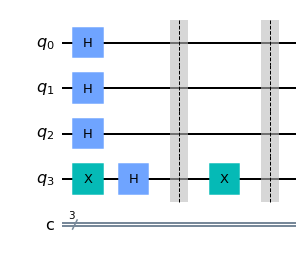

In [32]:
# prepare the states. The last state must be 1
detectCircuit = QuantumCircuit(n, n - 1)
detectCircuit.x(n - 1)

# Apply a Hadamard gate on each qubit
for i in range(n):
    detectCircuit.h(i)

constantDetectCircuit = detectCircuit.copy(name = "constantDetectCircuit")
balancedDetectCircuit = detectCircuit.copy(name = "balancedDetectCircuit")

# Add the function circuit to this circuit
constantDetectCircuit.barrier()
balancedDetectCircuit.barrier()
constantDetectCircuit.compose(constantFunction, qubits = [0, 1, 2, 3], inplace = True)
balancedDetectCircuit.compose(balancedFunction, qubits = [0, 1, 2, 3], inplace = True)
balancedDetectCircuit.barrier()
constantDetectCircuit.barrier()

constantDetectCircuit.draw()

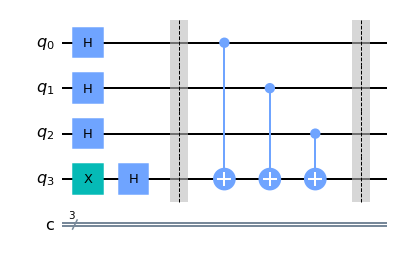

In [33]:
balancedDetectCircuit.draw()

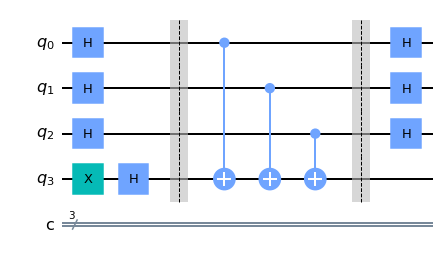

In [34]:
# apply hadamard gates on first n qubits
for i in range(n - 1):
    balancedDetectCircuit.h(i)
    constantDetectCircuit.h(i)

balancedDetectCircuit.draw()

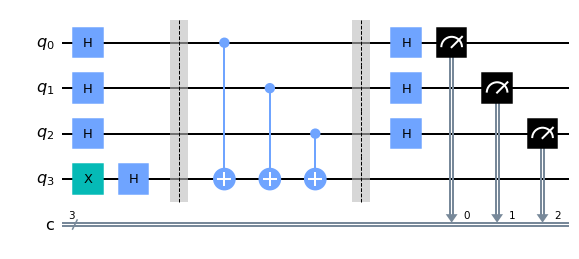

In [35]:
# measure the first n - 1 bits, ignore the last bit
for i in range(n - 1):
    balancedDetectCircuit.measure(i, i)
    constantDetectCircuit.measure(i, i)

balancedDetectCircuit.draw()

In [36]:
# assembling the circuit for the backend
qObjConst = assemble(constantDetectCircuit)
qObjBalan = assemble(balancedDetectCircuit)

# the result, after the circuit runs on the backend, contains the counts (and thus the probabilities) of all measuring possibilities.
resultConst = backend.run(qObjConst).result()
resultBalan = backend.run(qObjBalan).result()

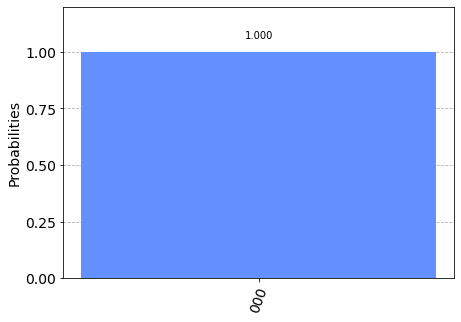

In [37]:
# this histogram must contain all zeros
countConst = resultConst.get_counts()
plot_histogram(countConst)
# Seeing this histogram confirms the entanglement (with half of the time qubit observed is 01 and other half is 1*)
# So measuring 1 on the first qubit tells with certainty that the second qubit is 1. Similarly, the reverse is also true.

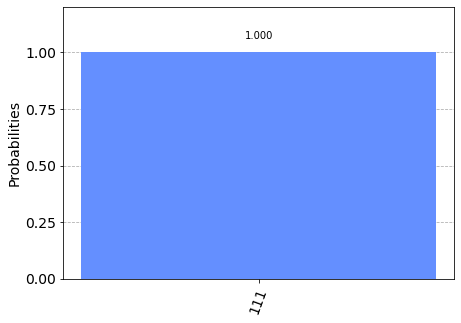

In [38]:
# the result will have anything except all zeros
countBalan = resultBalan.get_counts()
plot_histogram(countBalan)